In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math 
import seaborn as sns

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [19]:
save_folder = 'data_nan_mean_no_Island'
X_train = pd.read_csv('../data/' + save_folder + '/X_train.csv').values
y_train = pd.read_csv('../data/' + save_folder + '/y_train.csv').values
X_test = pd.read_csv('../data/' + save_folder + '/X_test.csv').values
y_test = pd.read_csv('../data/' + save_folder + '/y_test.csv').values


y_train = np.squeeze(y_train)
n_values = np.max(y_train) + 1
y_train = np.eye(n_values)[y_train]


y_test = np.squeeze(y_test)
n_values = np.max(y_test) + 1
y_test = np.eye(n_values)[y_test]

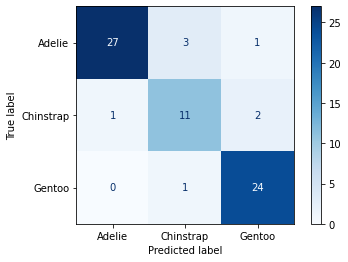

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


def myweight(distances):
    sigma2 = 1 # we can change this number
    return np.exp(-distances**2/sigma2)


# check classification accuracy of KNN with K=2
knn = KNeighborsClassifier(n_neighbors=2, weights=myweight)
knn.fit(X_train, y_train)

y_predict = knn.predict(X_test)
y_predict = np.argmax(y_predict, axis=1)
y_test_label = np.argmax(y_test, axis=1)


labels = ["Adelie", "Chinstrap", "Gentoo"]

cm = confusion_matrix(y_test_label, y_predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
# plt.savefig('../pics/random_forest/confusion_matrix')
# plt.savefig('../pics/random_forest/confusion_matrix.pdf')
plt.show()